# Tanzania Waterpoints Big picture

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [3]:
training_values = pd.read_csv('Training Values-Copy1.csv')
training_labels= pd.read_csv('Training Labels-Copy1.csv')

In [4]:
raw_data_merged = training_values.merge(training_labels, on="id")

In [108]:
df = pd.read_csv('clean_training_set.csv', index_col='id')

In [109]:
df.drop('Unnamed: 0', axis=1, inplace=True)

map

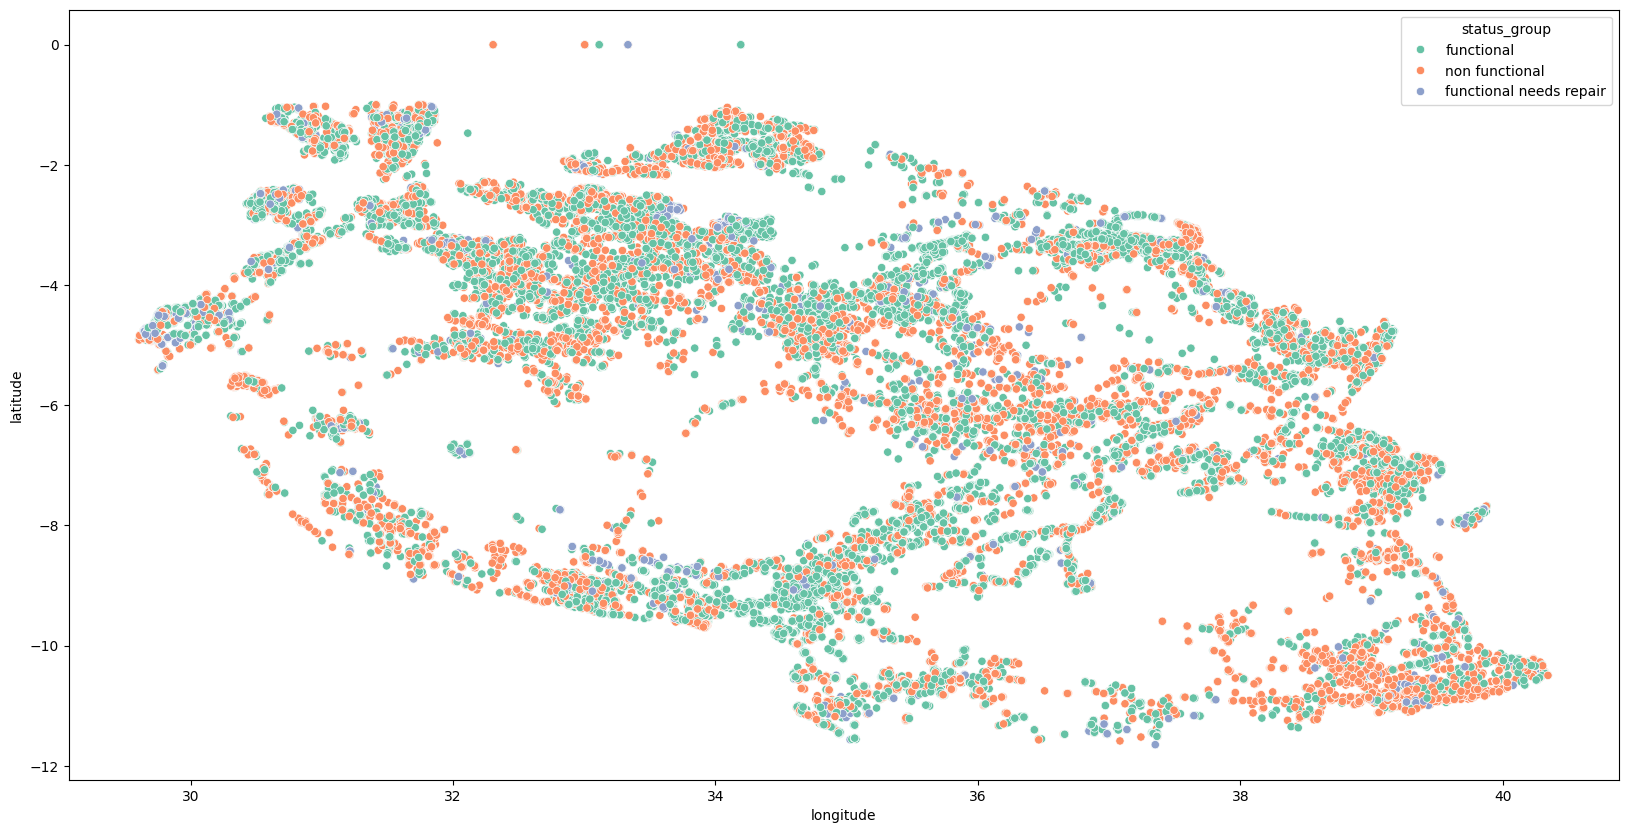

In [30]:
fig, ax  = plt.subplots(figsize=(20,10))
loc_data = df.loc[(df.longitude>0) & (df.latitude<0)]
sns.scatterplot(data=loc_data, x="longitude", y="latitude", hue="status_group", ax=ax,palette = 'Set2')
fig.savefig("map.png", dpi=300)

In [72]:
df_region = df.groupby('region').agg(
    total_population=('population', 'sum'), 
    total_pumps=('latitude', 'count')             
).reset_index()

In [75]:
df_region['population_per_pump'] = df_region['total_population'] / df_region['total_pumps']
df_region_sorted = df_region.sort_values('population_per_pump', ascending=False)

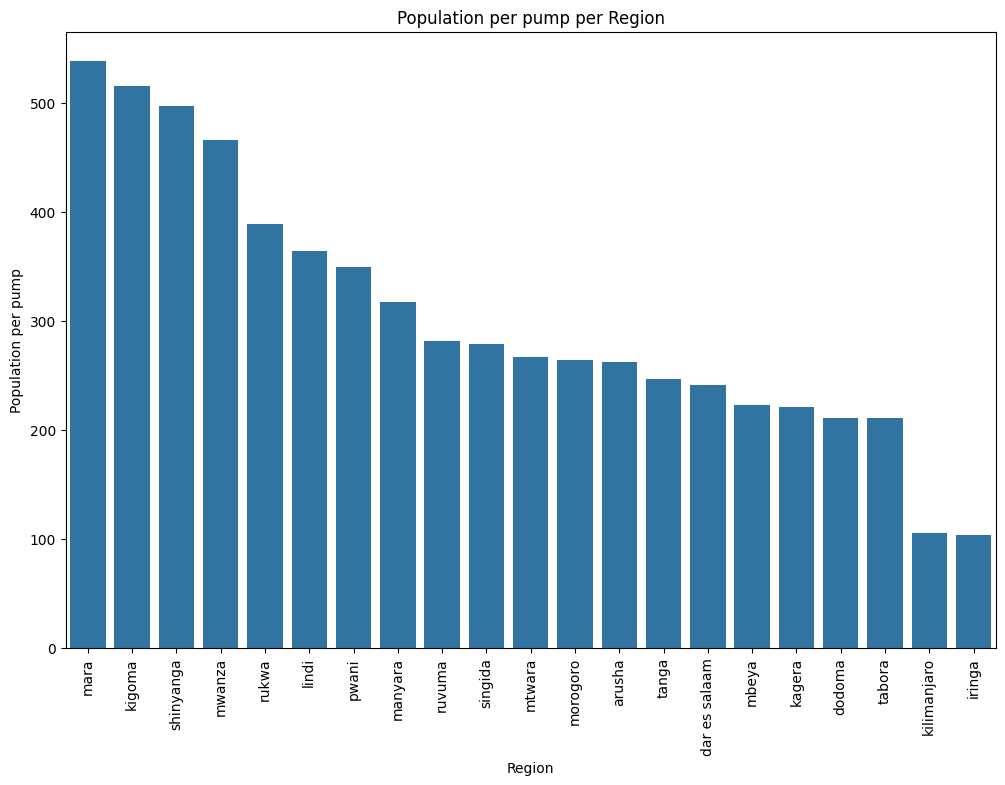

In [76]:
plt.figure(figsize=(12, 8))
sns.barplot(x='region', y='population_per_pump', data=df_region_sorted)
plt.xticks(rotation=90) 
plt.xlabel('Region')
plt.ylabel('Population per pump')
plt.title('Population per pump per Region')
plt.show()

No functionnal pumps

In [85]:
df.status_group.value_counts()/len(df)*100

status_group
functional                 54.308081
non functional             38.424242
functional needs repair     7.267677
Name: count, dtype: float64

/var/folders/yd/gfq2m1_d7rz1csn10_r09zkc0000gn/T/ipykernel_35005/3262693545.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df.status_group, palette = 'Set2')


Text(0, 0.5, 'Number of pumps')

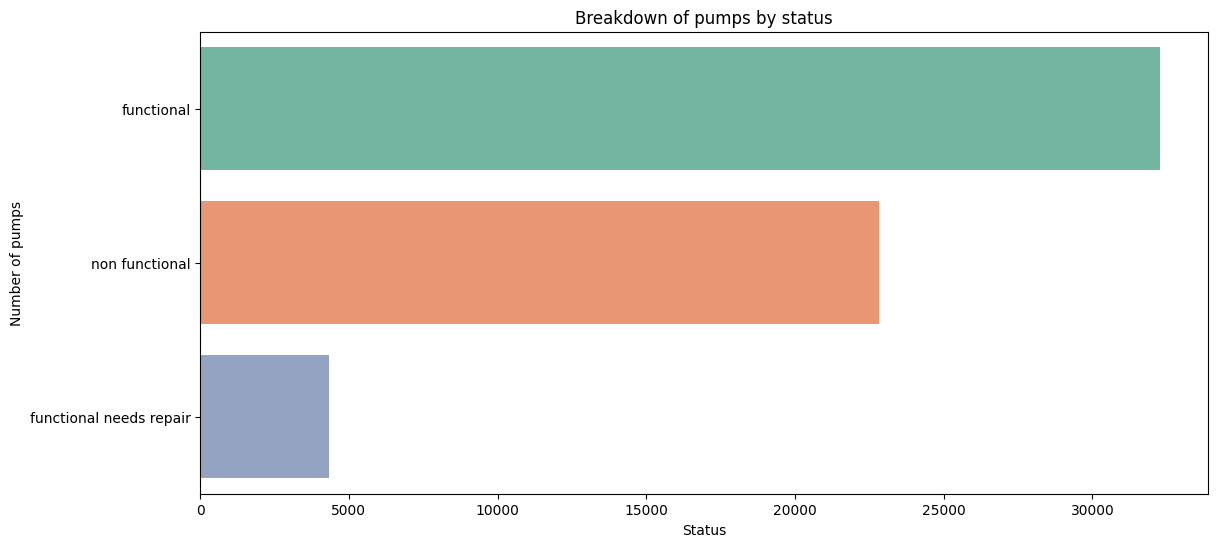

In [36]:
plt.figure(figsize=(13,6))
sns.countplot(df.status_group, palette = 'Set2')
plt.title('Breakdown of pumps by status')
plt.xlabel("Status")
plt.ylabel("Number of pumps")

In [38]:
total_nok_pumps = df[(df['status_group'] == 'non functional')]['population'].sum()

In [39]:
total_nok_pumps

6529698.0

Text(0, 0.5, 'Number of water pumps')

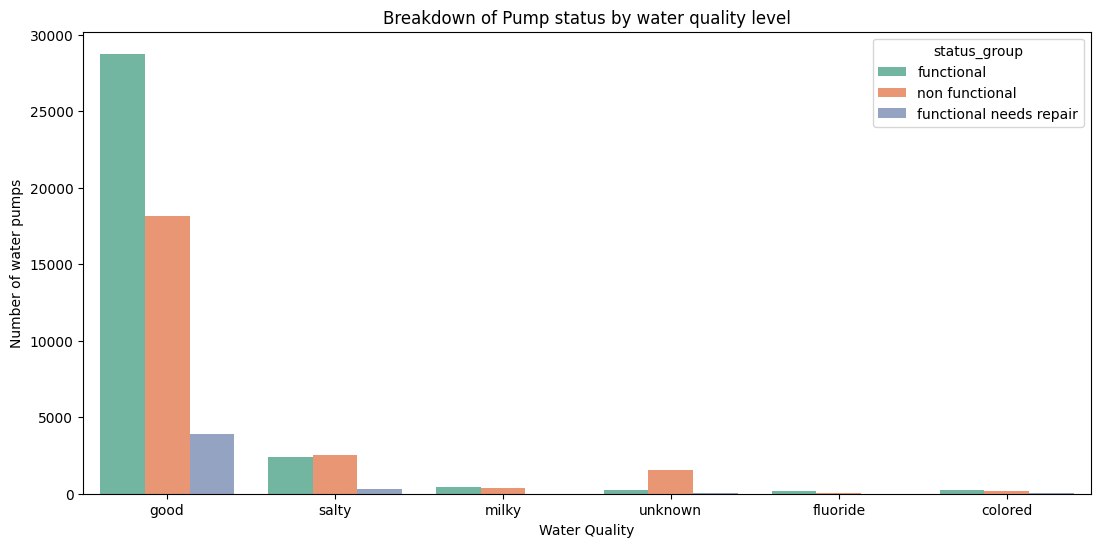

In [93]:
plt.figure(figsize=(13,6))
sns.countplot(data=raw_data_merged, x="quality_group", hue="status_group",palette = 'Set2')
plt.title('Breakdown of Pump status by water quality level')
plt.xlabel("Water Quality")
plt.ylabel("Number of water pumps")

In [91]:
population_impact = df[
    (df['water_quality'] == 'soft') & 
    (df['status_group'] == 'non functional')
]['population'].sum()

In [92]:
population_impact

5135206.5

Text(0, 0.5, 'Number of water pumps')

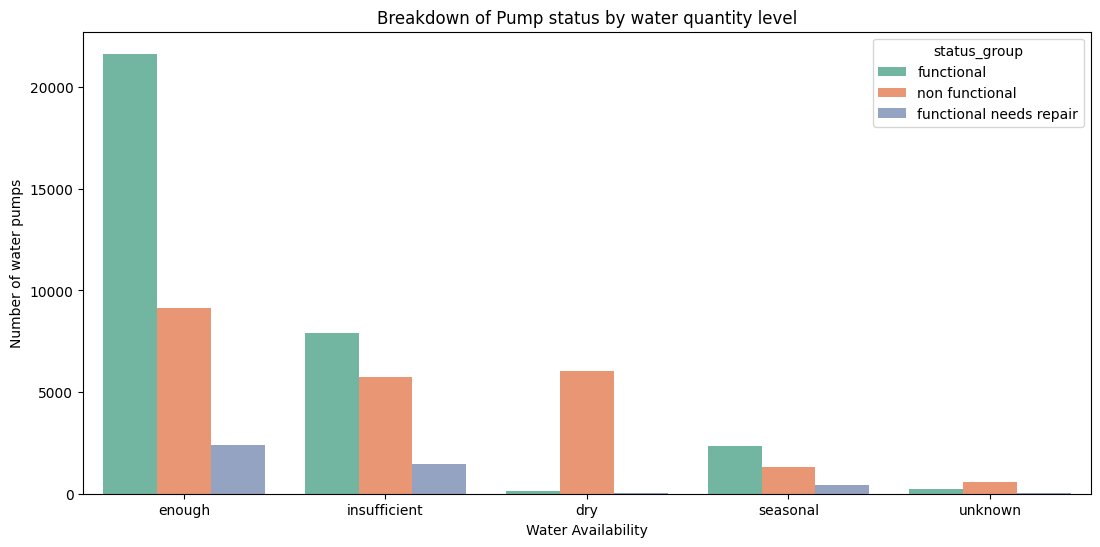

In [96]:
plt.figure(figsize=(13,6))
sns.countplot(data=raw_data_merged, x="quantity_group", hue="status_group",palette = 'Set2')
plt.title('Breakdown of Pump status by water quantity level')
plt.xlabel("Water Availability")
plt.ylabel("Number of water pumps")

In [99]:
population_impact = df[
    (df['quantity'] == 'enough') & 
    (df['status_group'] == 'non functional')
]['population'].sum()

In [100]:
population_impact

2732507.5

In [125]:
df[(df['water_quality'] == 'soft') & 
                      (df['quantity'] == 'enough') & 
                      (df['status_group'] == 'non functional')].shape

(8035, 21)

In [122]:
total_impacted = df[(df['water_quality'] == 'soft') & 
                      (df['quantity'] == 'enough') & 
                      (df['status_group'] == 'non functional')]['population'].sum()

In [102]:
total_pump = df[(df['water_quality'] == 'soft') & 
                      (df['quantity'] == 'enough') & 
                      (df['status_group'] == 'non functional')].count()

In [11]:
total_population = df['population'].sum()

In [12]:
total_population

17340852.5

In [123]:
total_impacted

2278461.0

In [129]:
percentage_impacted = total_impacted/total_population*100
percentage_impacted

13.139267518710513

# Recommendations

In [138]:
preprocessor = joblib.load('prepoc.pkl')
model = joblib.load('rf.pkl')

In [140]:
encoded_feature_names = preprocessor.get_feature_names_out()

feature_importances = model.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': encoded_feature_names, 'Importance': feature_importances})

feature_importance_df['Original Feature'] = feature_importance_df['Feature'].apply(lambda x: x.split('__')[-1])

aggregated_importance = feature_importance_df.groupby('Original Feature')['Importance'].sum().reset_index()

aggregated_importance = aggregated_importance.sort_values(by='Importance', ascending=False)

aggregated_importance.head(15)

,Original Feature,Importance
31,longitude,0.084780
30,latitude,0.083391
29,gps_height,0.049294
44,operation_time,0.042920
53,quantity_dry,0.038509
52,population,0.038022
54,quantity_enough,0.027185
0,amount_tsh,0.022662
10,district_code,0.022541
2239,waterpoint_type_other,0.018600


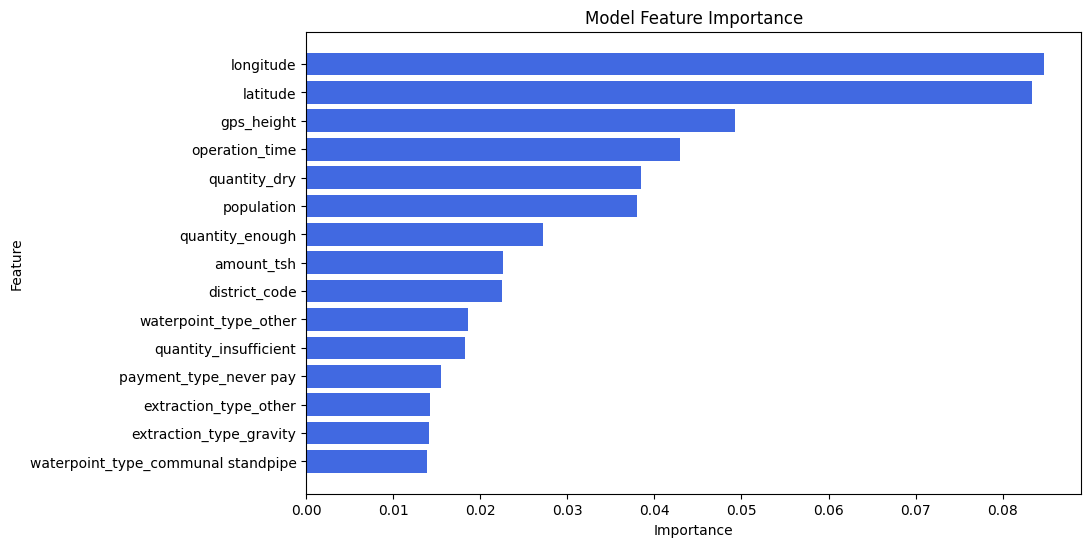

In [143]:
plt.figure(figsize=(10, 6))
plt.barh(aggregated_importance['Original Feature'].head(15), aggregated_importance['Importance'].head(15), color='royalblue')
plt.gca().invert_yaxis() 
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Model Feature Importance")
plt.show()

Remplacement & reparation

'scheme_management',
       'extraction_type', 'management' 'scheme_management', 'payment_type',
       'operation_time', 'top_installer', 'top_funders

extraction_type

Text(0, 0.5, 'Number of water pumps')

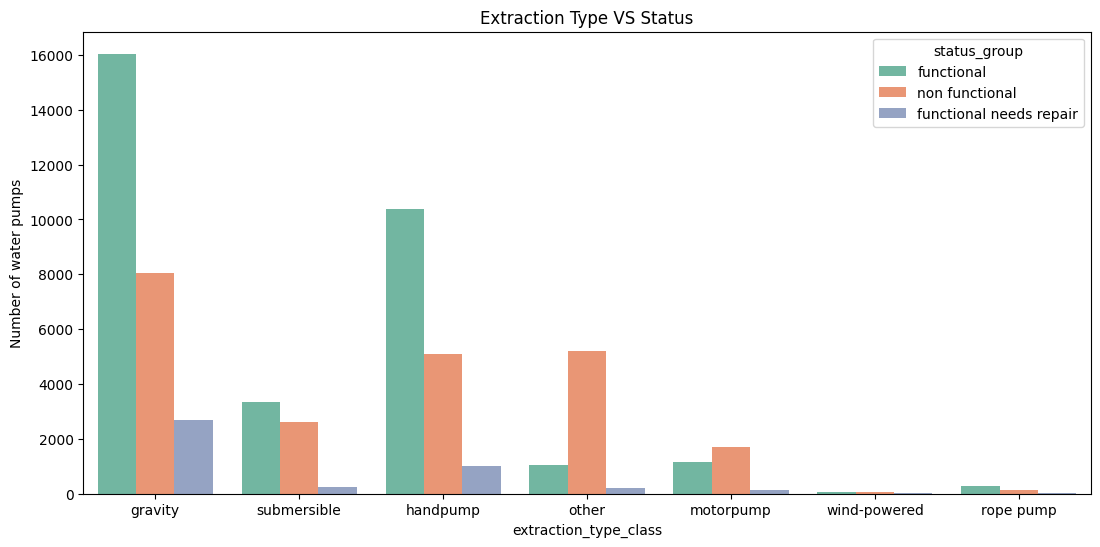

In [150]:
plt.figure(figsize=(13,6))
sns.countplot(data=raw_data_merged, x="extraction_type_class", hue="status_group",palette = 'Set2')
plt.title('Extraction Type VS Status')
plt.xlabel("extraction_type_class")
plt.ylabel("Number of water pumps")

Text(0, 0.5, 'Number of water pumps')

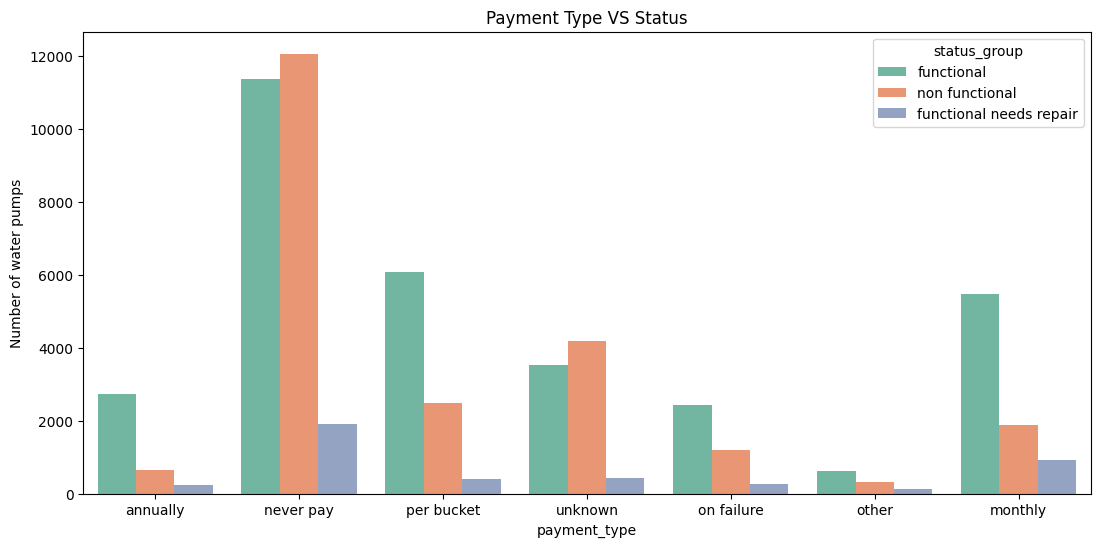

In [152]:
plt.figure(figsize=(13,6))
sns.countplot(data=raw_data_merged, x="payment_type", hue="status_group",palette = 'Set2')
plt.title('Payment Type VS Status')
plt.xlabel("payment_type")
plt.ylabel("Number of water pumps")

In [107]:
df['top_funders'].unique()

array(['roman', 'grumeti', 'lottery club', 'unicef', 'action in a',
       'mkinga distric coun', 'dwsp', 'rwssp', 'wateraid', 'isingiro ho',
       'private', 'danida', 'world vision', 'lawatefuka water supply',
       'biore', 'rudep', 'hesawa', 'Others'], dtype=object)

In [178]:
top_10_funders = df['top_funders'].value_counts().head(10).index

In [179]:
df_funder = df[df['top_funders'].isin(top_10_funders)]

In [183]:
top_10_installers = df['top_installer'].value_counts().head(10).index
df_insallers = df[df['top_installer'].isin(top_10_installers)]

Text(0, 0.5, 'Number of water pumps')

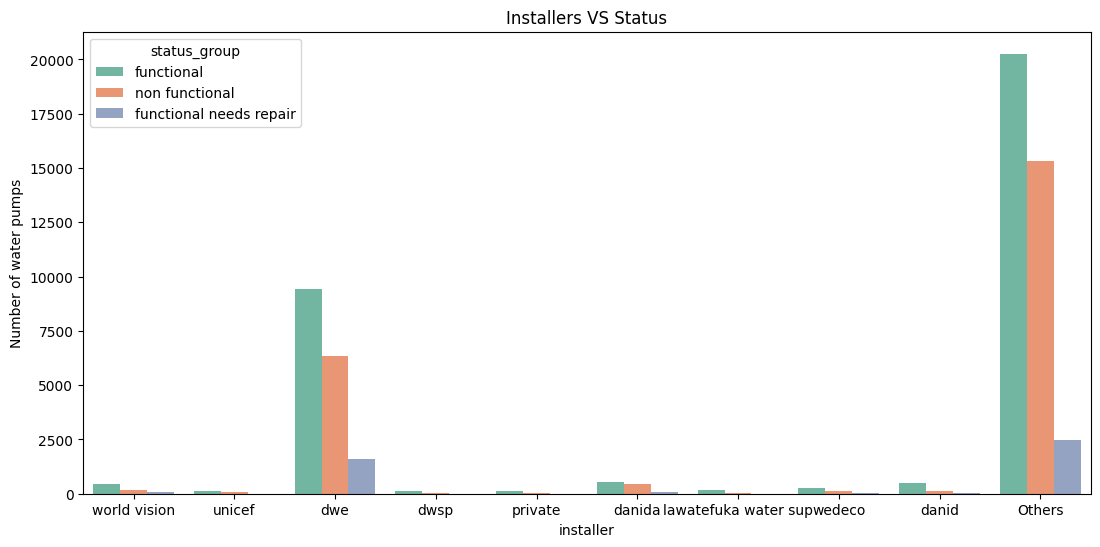

In [185]:
plt.figure(figsize=(13,6))
sns.countplot(data=df_insallers, x="top_installer", hue="status_group",palette = 'Set2')
plt.title('Installers VS Status')
plt.xlabel("installer")
plt.ylabel("Number of water pumps")

Text(0, 0.5, 'Number of water pumps')

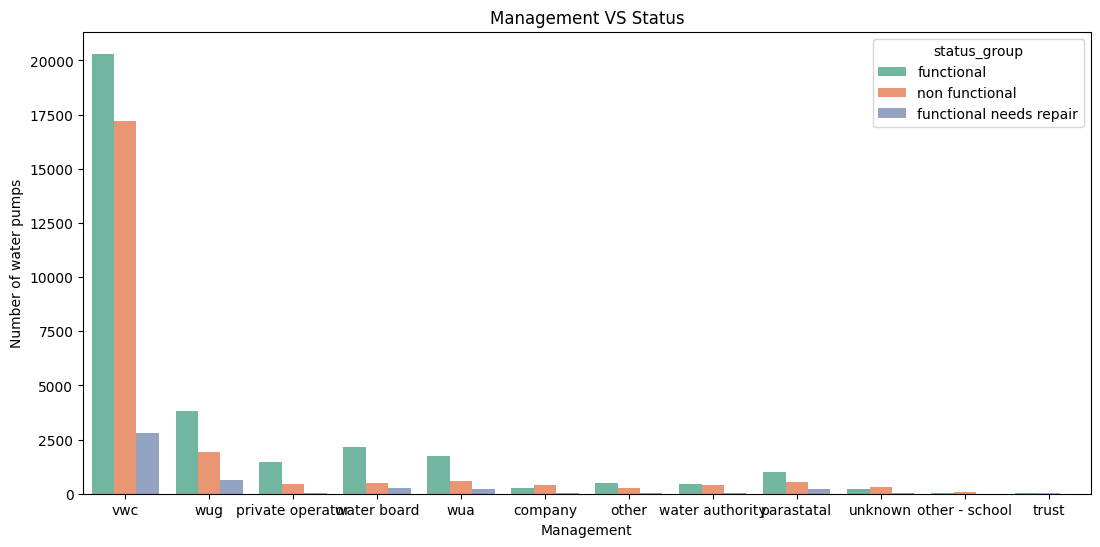

In [187]:
plt.figure(figsize=(13,6))
sns.countplot(data=df_insallers, x="management", hue="status_group",palette = 'Set2')
plt.title('Management VS Status')
plt.xlabel("Management")
plt.ylabel("Number of water pumps")

New implementation

Text(0, 0.5, 'Number of water pumps')

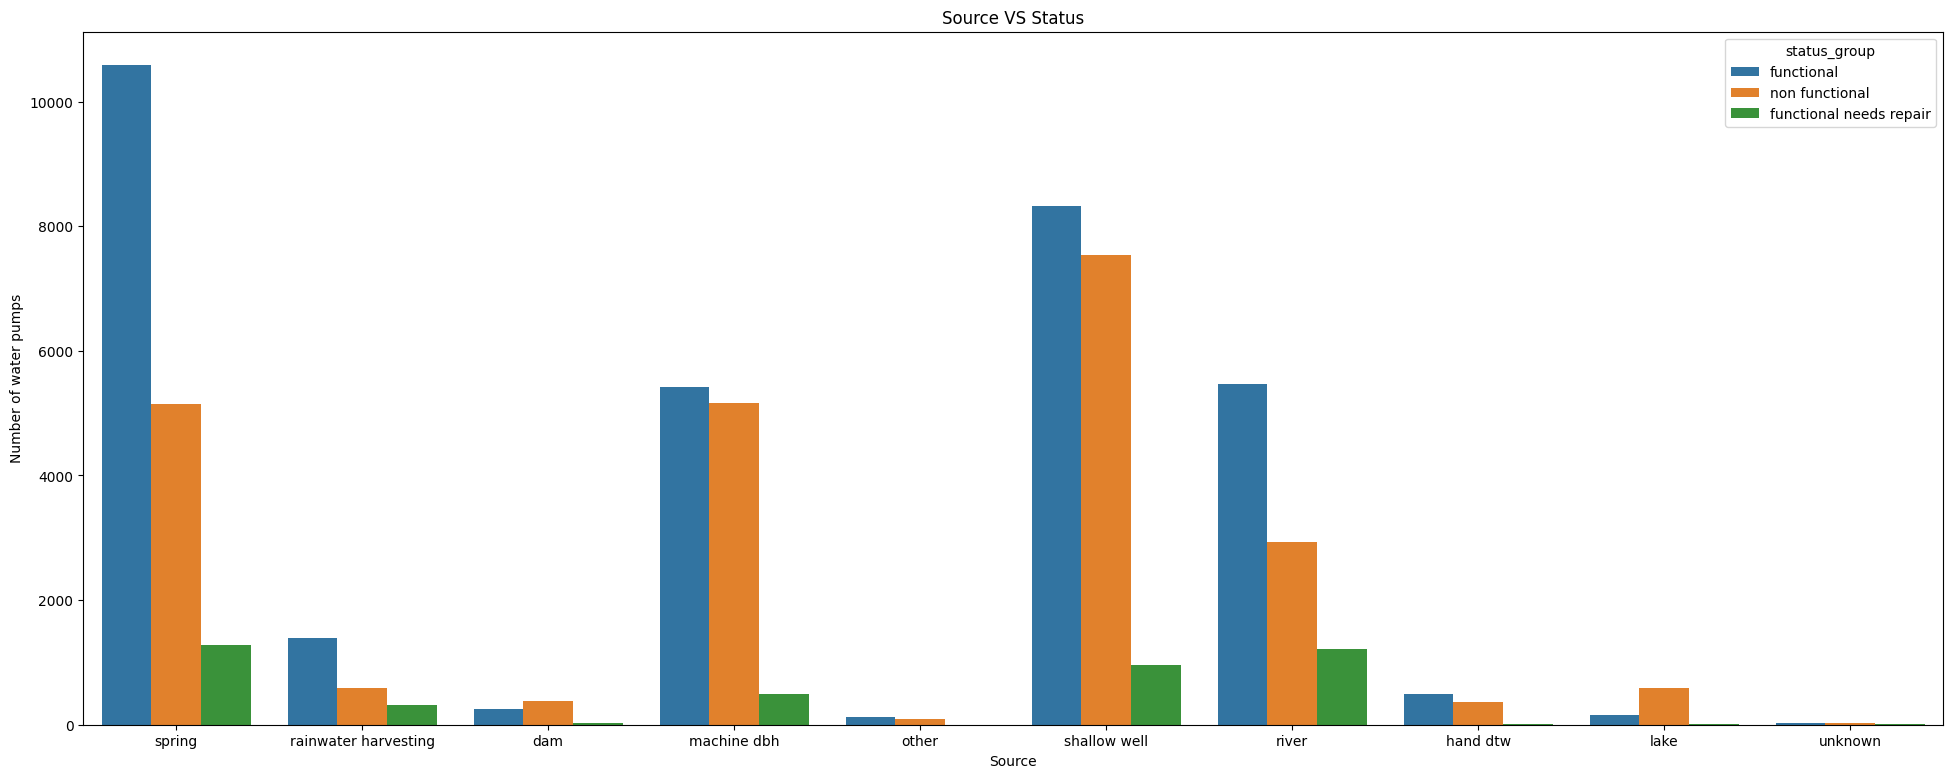

In [198]:
plt.figure(figsize=(24, 9))

sns.countplot(data=df,x='source',hue='status_group')
plt.title('Source VS Status')
plt.xlabel("Source")b
plt.ylabel("Number of water pumps")

Text(0, 0.5, 'Number of water pumps')

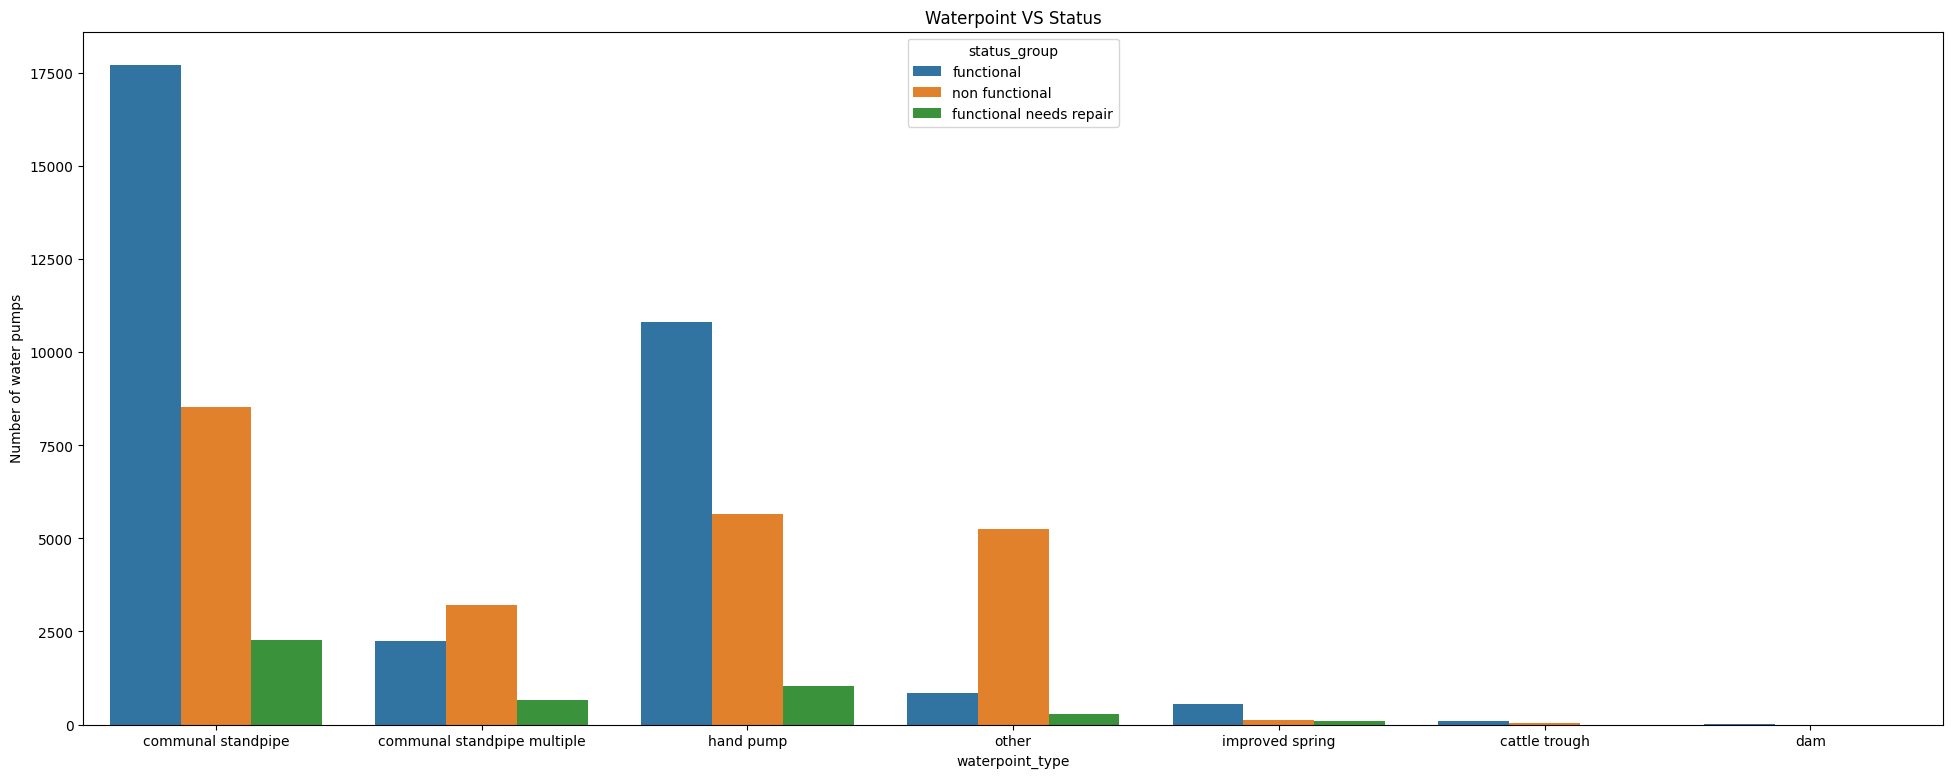

In [201]:
plt.figure(figsize=(24, 9))

sns.countplot(data=df,x='waterpoint_type',hue='status_group')
plt.title('Waterpoint VS Status')
plt.xlabel("waterpoint_type")
plt.ylabel("Number of water pumps")

amount_tsh', 'gps_height', 'basin', 'source', 'waterpoint_type', 

Text(0, 0.5, 'Number of water pumps')

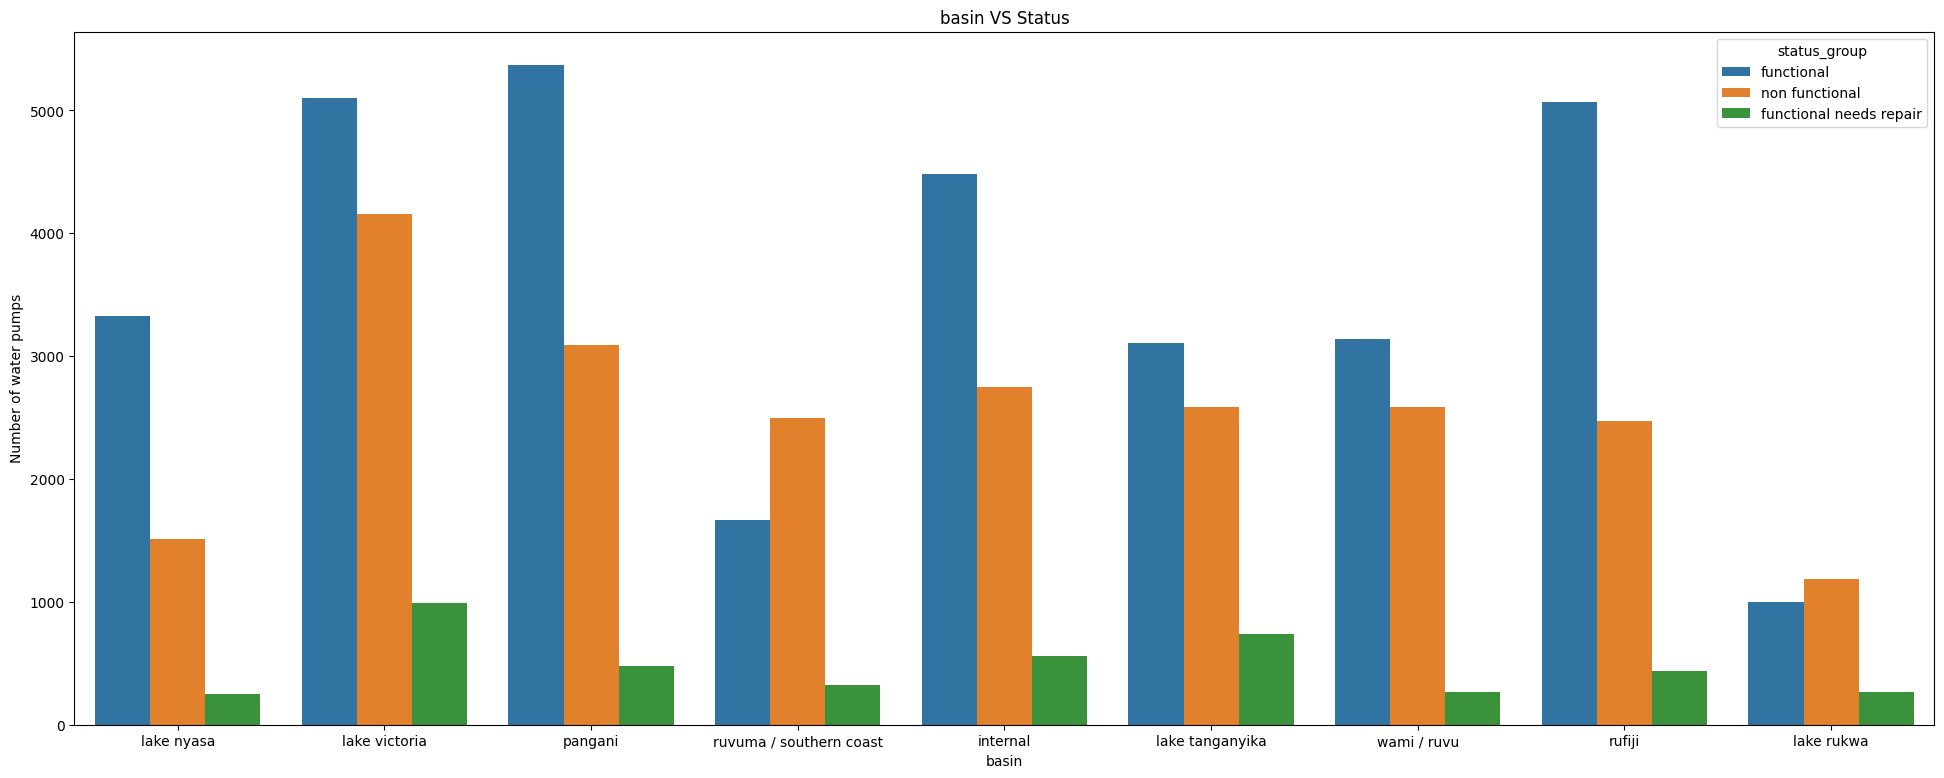

In [203]:
plt.figure(figsize=(24, 9))
sns.countplot(data=df,x='basin',hue='status_group')
plt.title('basin VS Status')
plt.xlabel("basin")
plt.ylabel("Number of water pumps")

/Users/Flotchi/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/Users/Flotchi/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/Users/Flotchi/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


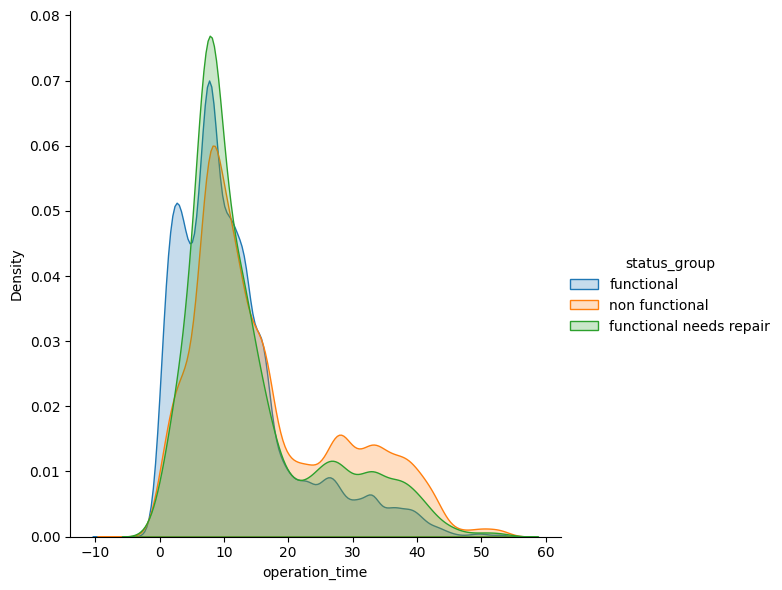

In [12]:
g = sns.FacetGrid(df, hue='status_group', height=6)
g.map(sns.kdeplot, 'operation_time', shade=True)
g.add_legend()
plt.show()

/Users/Flotchi/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/Users/Flotchi/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/Users/Flotchi/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


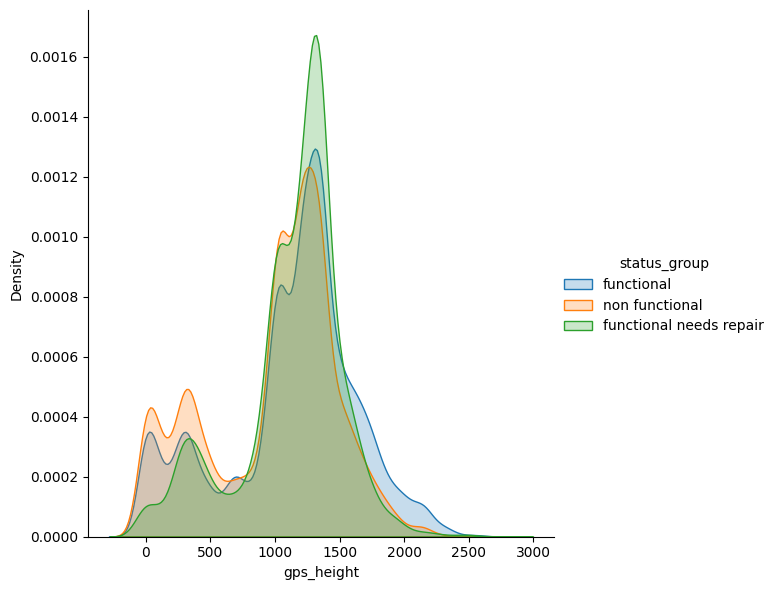

In [13]:
g = sns.FacetGrid(df, hue='status_group', height=6)
g.map(sns.kdeplot, 'gps_height', shade=True)
g.add_legend()
plt.show()

Text(0, 0.5, 'Number of water pumps')

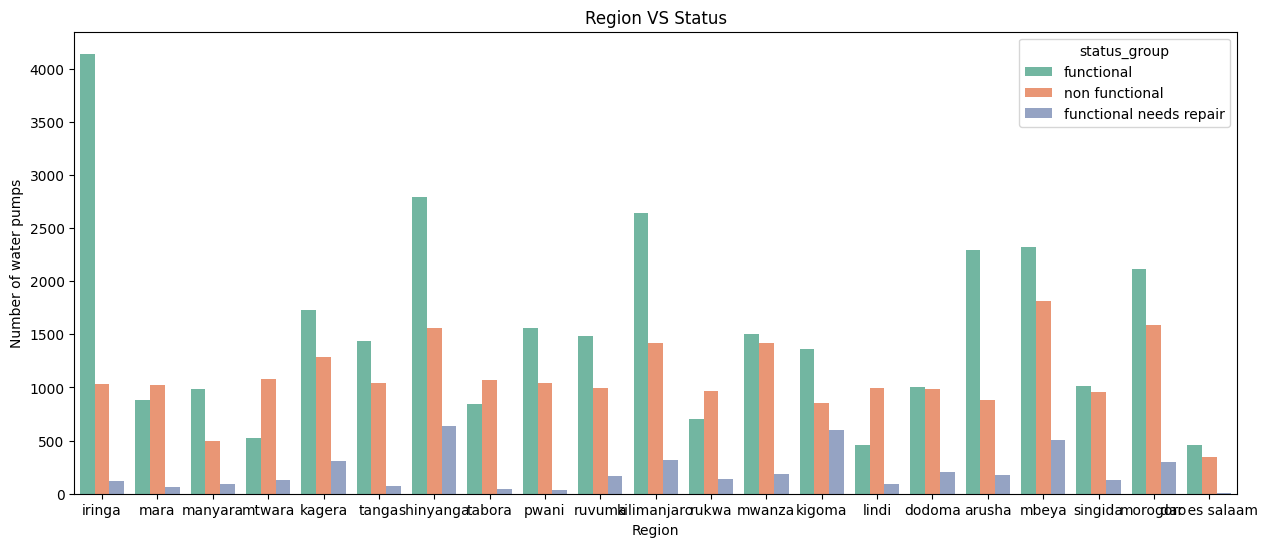

In [113]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x="region", hue="status_group",palette = 'Set2')
plt.title('Region VS Status')
plt.xlabel("Region")
plt.ylabel("Number of water pumps")

Text(0, 0.5, 'Number of water pumps')

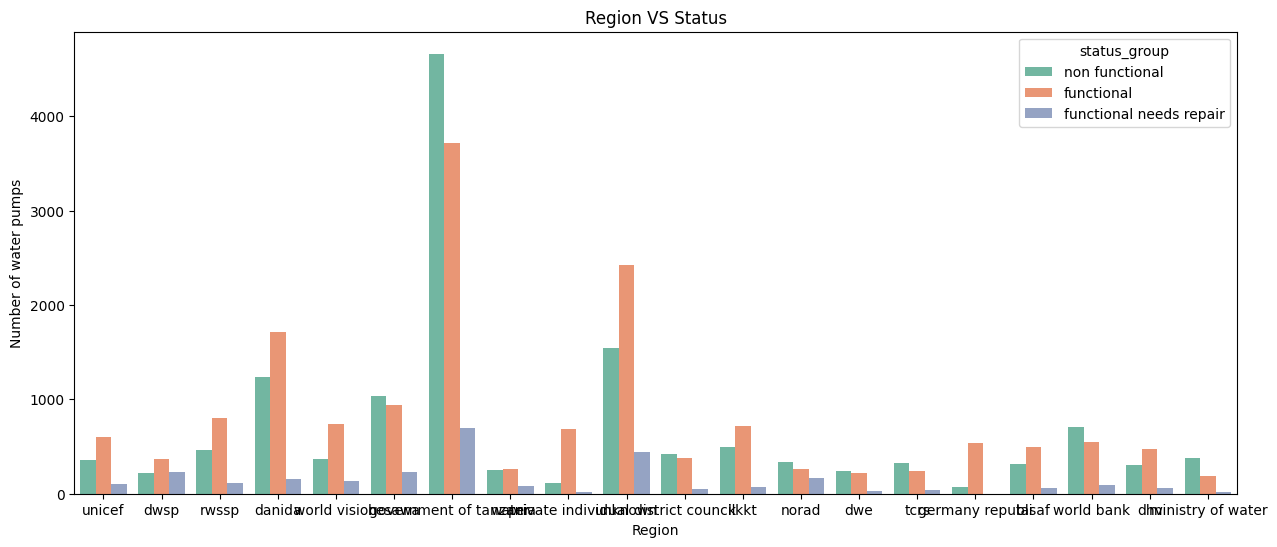

In [114]:
plt.figure(figsize=(15,6))
sns.countplot(data=df[df.top_funder!='Others'], x="top_funder", hue="status_group",palette = 'Set2')
plt.title('Region VS Status')
plt.xlabel("Region")
plt.ylabel("Number of water pumps")

Text(0, 0.5, 'Number of Water Pumps')

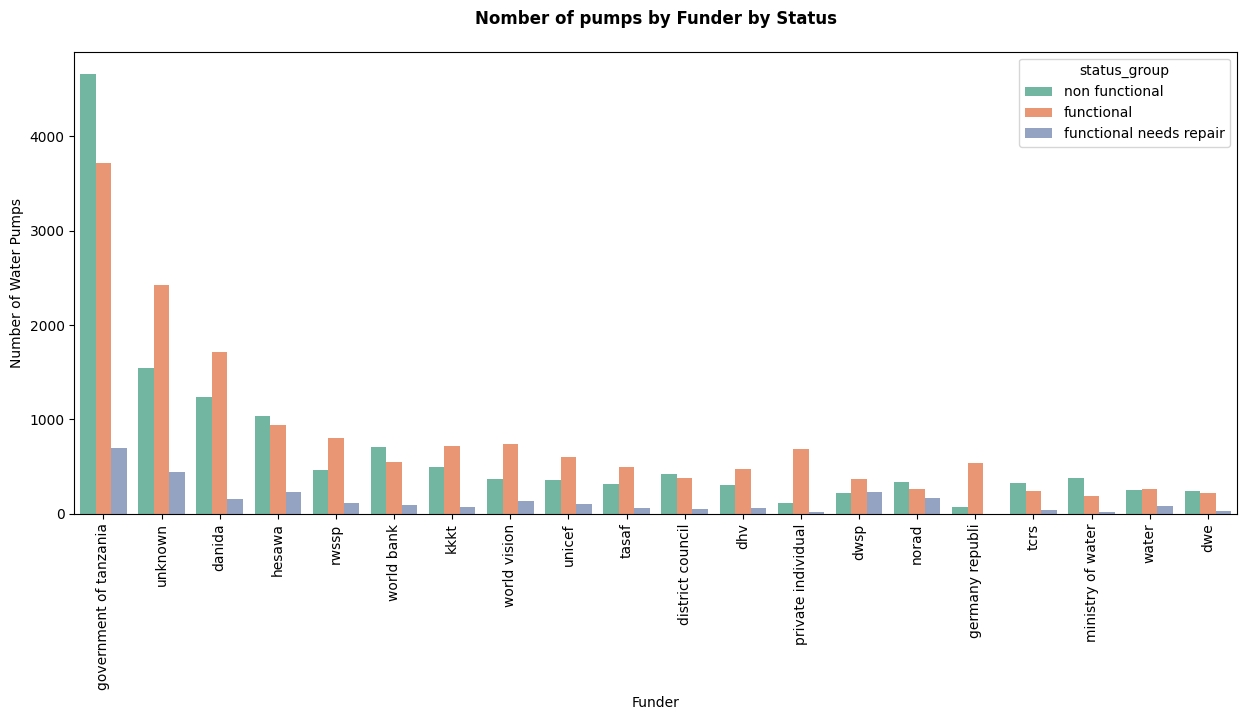

In [122]:
plt.figure(figsize=(15, 6))
ax = sns.countplot(
    data=df[df.top_funder != 'Others'],
    x="top_funder",
    hue="status_group",
    palette='Set2',
    order=df[df.top_funder != 'Others']['top_funder'].value_counts().index  
)


plt.xticks(rotation=90, ha='center')  
plt.title('Nomber of pumps by Funder by Status', fontweight='bold', pad=20)
plt.xlabel("Funder")
plt.ylabel("Number of Water Pumps")

Text(0, 0.5, 'Number of Water Pumps')

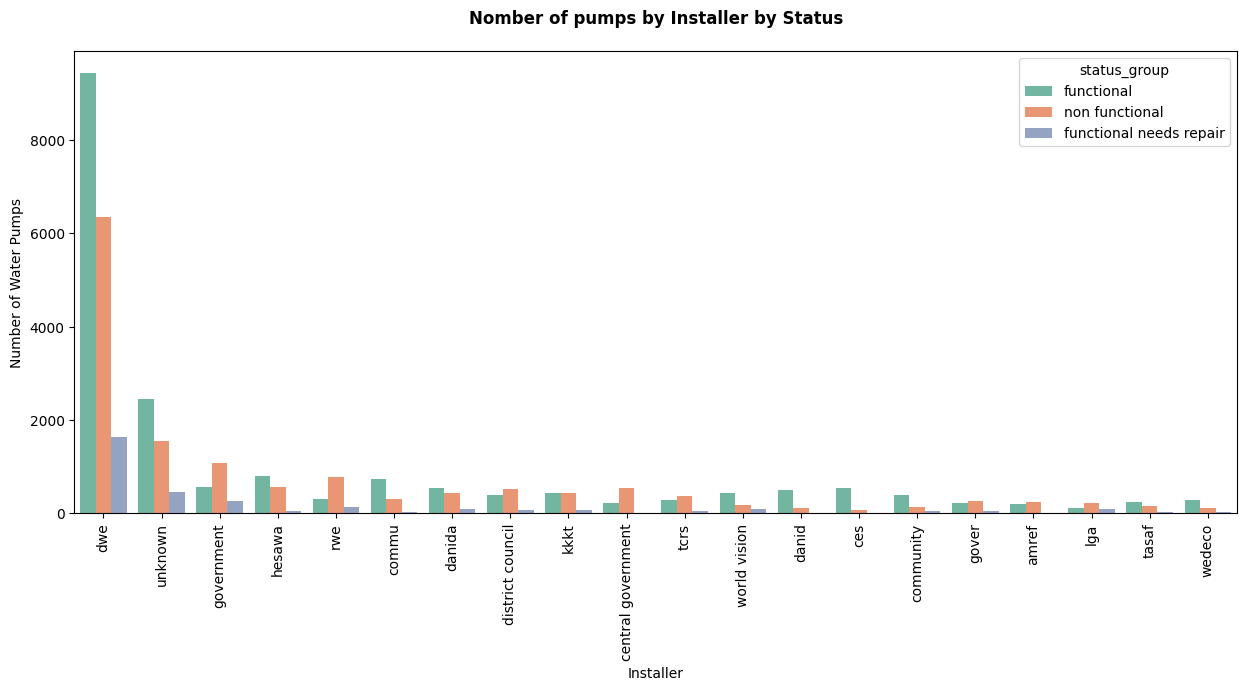

In [121]:
plt.figure(figsize=(15, 6))
ax = sns.countplot(
    data=df[df.top_installer != 'Others'],
    x="top_installer",
    hue="status_group",
    palette='Set2',
    order=df[df.top_installer != 'Others']['top_installer'].value_counts().index  
)


plt.xticks(rotation=90, ha='center')  
plt.title('Nomber of pumps by Installer by Status', fontweight='bold', pad=20)
plt.xlabel("Installer")
plt.ylabel("Number of Water Pumps")